 <h2 align='center'>Fake News Detection using Naive Bayes</h2>

<h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Assignment_Data_fake_or_real_news.csv')
df

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
df.label.value_counts()

,count
label,
REAL,3171
FAKE,3164


In [5]:
df.shape

(6335, 4)

In [6]:
df.isnull().sum()

,0
id,0
title,0
text,0
label,0


In [7]:
df

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [8]:
df.drop([ "id"], axis=1,inplace=True)


In [9]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [10]:
x = df.drop('label', axis=1)
y = df['label']

In [11]:
x

,title,text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene..."


In [12]:
y

,label
0,FAKE
1,FAKE
2,REAL
3,FAKE
4,REAL
...,...
6330,REAL
6331,FAKE
6332,FAKE
6333,REAL


In [13]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
x_train.shape

(5068, 2)

In [15]:
x_test.shape

(1267, 2)

In [16]:
y_train.shape

(5068,)

In [17]:
y_test.shape

(1267,)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [19]:
x_train

,title,text
2402,Why Putin praised Trump (Opinion),Christian Whiton is a former deputy special en...
1922,Super Tuesday Brings Harsh Light And Heartache...,Super Tuesday Brings Harsh Light And Heartache...
3475,Reduce Nurse Burnout by Treating Nurses as Wel...,Prev post Page 1 of 4 Next \nNurses are among ...
6197,"Dozens dead, including one American, as hostag...",The deadly hostage situation at a luxury hotel...
4748,Our new country: Women and minorities hit hardest,Our new country: Women and minorities hit hard...
...,...,...
4931,Many Clinton charity donors also got State Dep...,Twenty-two of the 37 corporations nominated fo...
3264,Possibility of fire aboard EgyptAir flight rai...,"As pieces of luggage, human remains, wreckage ..."
1653,"World Proud Of Its Calm, Measured Response To ...",0 Add Comment \nIN THE immediate aftermath of ...
2607,780 Palestinian homes razed in occupied W Bank...,Palestine Palestinians check the flat of Amjad...


In [20]:
# prompt: make bag of words with x_train

x_train_cv = cv.fit_transform(x_train['text'])

In [21]:
x_train_cv

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1729392 stored elements and shape (5068, 62020)>

In [22]:
x_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [23]:
x_train_cv.shape

(5068, 62020)

In [24]:
x_train_df = pd.DataFrame(x_train_cv.toarray(), columns=cv.get_feature_names_out())

In [25]:
x_train_df

,00,000,0000,000000031,00000031,000035,00006,0001pt,0002,000billion,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2> Train the naive bayes model <h2/>

In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_df, y_train)

MultinomialNB()

In [27]:
x_test

,title,text
3789,First Presidential Debate of 2016 Over But Who...,Watch the above reports by CBN's David Brody a...
733,Bernie Sanders Says What The Media Won’t: Trum...,"— Bernie Sanders (@BernieSanders) October 27, ..."
4783,Militarized Police Brutalize and Arrest Peacef...,"\nAs of October 29, there have been at least 1..."
3067,Congress: Hillary Will Be Impeached If She Bec...,Members of Congress have said that if Hillary ...
5288,"For Trump, turning this around won't be easy",Julian Zelizer is a professor of history and p...
...,...,...
5121,Iraqis think the U.S. is in cahoots with the I...,On the front lines of the battle against the I...
6112,At least 20 hostages dead in siege of hotel in...,Several gunmen seized a luxury hotel in Mali’s...
2661,Obamacare Architect Gruber Demands “Larger Man...,Paul Joseph Watson Bureaucrat who said “stup...
59,Donald Trump: Hillary Clinton has 'caused trem...,Republican presidential front-runner Donald Tr...


<h3>Evaluate Performance</h3>

In [28]:
y_test

,label
3789,REAL
733,FAKE
4783,FAKE
3067,FAKE
5288,REAL
...,...
5121,REAL
6112,REAL
2661,FAKE
59,REAL


In [29]:
x_test_cv = cv.transform(x_test['text'])

In [30]:
x_test_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [31]:
x_test_cv.shape

(1267, 62020)

In [32]:
model.score(x_test_cv, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


0.8800315706393055

In [33]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test_cv)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        FAKE       0.91      0.83      0.87       615
        REAL       0.85      0.93      0.89       652

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


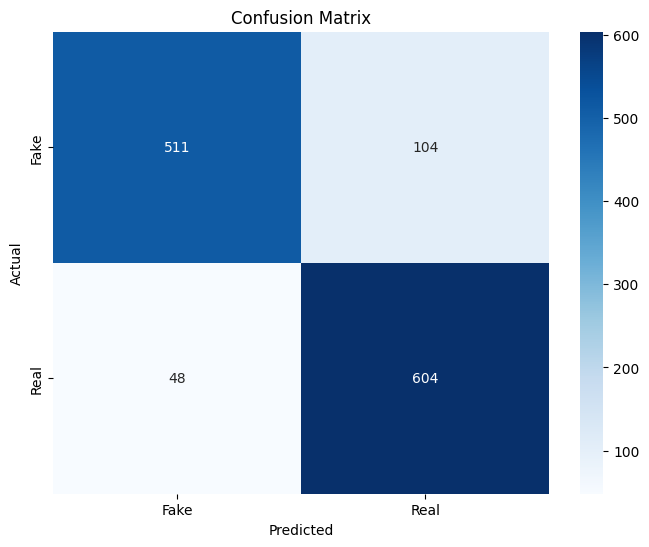

In [34]:
# prompt: Create Classification Report and Confusion Matrix with seaborn

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
predction = model.predict(x_test_cv)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [36]:
# prompt: generate a random news and put this into a list

random_news_index = np.random.randint(0, len(x_test))
random_news_text = x_test.iloc[random_news_index]['text']

# Store the text in a list
random_news_list = [random_news_text]

random_news_list


['0 comments GOP VP candidate Mike Pence’s Trump plane slid off the runway at LaGuardia airport Thursday evening, landing in the mud not far from the East River. \nThe Trump plane stopped in the mud. It broke through a thin veneer of concrete designed to give way to keep planes from sliding into the river. \nNo one was injured in the incident. Authorities say there could have been fatalities had the plane ended up in the water. \nKTLA 5 reports : \nRescue crews were responding to the scene. The incident took place during a rainy night in the city. \nThe press pool in the back of the aircraft could feel the plane fishtailing as it touched down and sliding off the runway before coming to a very sharp halt in the grass off the side of the runway. \n“We could feel the plane moving, and it was just not a natural landing that you experience,” CNN’s Elizabeth Landers, who was on the plane, told CNN’s Erin Burnett on “OutFront.” \nStephanie Grisham, a spokeswoman for Donald Trump’s campaign, s

In [37]:
# prompt: predic the random_news_list

random_news_cv = cv.transform(random_news_list)
predicted_label = model.predict(random_news_cv)

print("Predicted label for the random news:", predicted_label[0])

Predicted label for the random news: REAL


In [39]:
# prompt: generate a another funny news and put this into a list

another_random_news_index = np.random.randint(0, len(x_test))
another_random_news_text = x_test.iloc[another_random_news_index]['text']

# Append the new random news text to the existing list
random_news_list.append(another_random_news_text)

random_news_list

another_random_news_cv = cv.transform([another_random_news_text])
another_predicted_label = model.predict(another_random_news_cv)

print("Predicted label for the another random news:", another_predicted_label[0])

Predicted label for the another random news: REAL


['0 comments GOP VP candidate Mike Pence’s Trump plane slid off the runway at LaGuardia airport Thursday evening, landing in the mud not far from the East River. \nThe Trump plane stopped in the mud. It broke through a thin veneer of concrete designed to give way to keep planes from sliding into the river. \nNo one was injured in the incident. Authorities say there could have been fatalities had the plane ended up in the water. \nKTLA 5 reports : \nRescue crews were responding to the scene. The incident took place during a rainy night in the city. \nThe press pool in the back of the aircraft could feel the plane fishtailing as it touched down and sliding off the runway before coming to a very sharp halt in the grass off the side of the runway. \n“We could feel the plane moving, and it was just not a natural landing that you experience,” CNN’s Elizabeth Landers, who was on the plane, told CNN’s Erin Burnett on “OutFront.” \nStephanie Grisham, a spokeswoman for Donald Trump’s campaign, s